<a href="https://colab.research.google.com/github/Pulsar-kkaturi/DL-Education/blob/master/VisionDL_Lecture/Lecture2_MathofNN_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2. 신경망의 이해

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

## 1. 신경망을 위한 데이터 표현

### 1.1. 텐서

텐서 표현

In [2]:
# 스칼라
x1 = np.array(12)
print(f'scalar x1 = {x1}  (rank-{x1.ndim} tensor)')
# 벡터
x2 = np.array([3, 7, 9, 8, 1])
print(f'vector x2 = {x2}  (rank-{x2.ndim} tensor)')
# 행렬
x3 = np.array([[1,1,1], [2,2,2], [1,2,3]])
print(f'matrix x3 = {x3}  (rank-{x3.ndim} tensor)')

scalar x1 = 12  (rank-0 tensor)
vector x2 = [3 7 9 8 1]  (rank-1 tensor)
matrix x3 = [[1 1 1]
 [2 2 2]
 [1 2 3]]  (rank-2 tensor)


텐서의 핵심 속성

In [3]:
# MNIST 데이터
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# MNIST 데이터의 핵심 속성
print('축의 개수(랭크) = ', train_images.ndim)
print('크기 = ', train_images.shape)
print('데이터 타입 = ', train_images.dtype)

축의 개수(랭크) =  3
크기 =  (60000, 28, 28)
데이터 타입 =  uint8


In [5]:
# MNIST 데이터의 배치(batch) 분류
batch_list = []
for idx in range(6):
  batch_list.append(train_images[10000*idx:10000*(idx+1)])
print('총 배치의 수 = ', len(batch_list))
print('각 배치의 크기 = ', batch_list[0].shape)

총 배치의 수 =  6
각 배치의 크기 =  (10000, 28, 28)


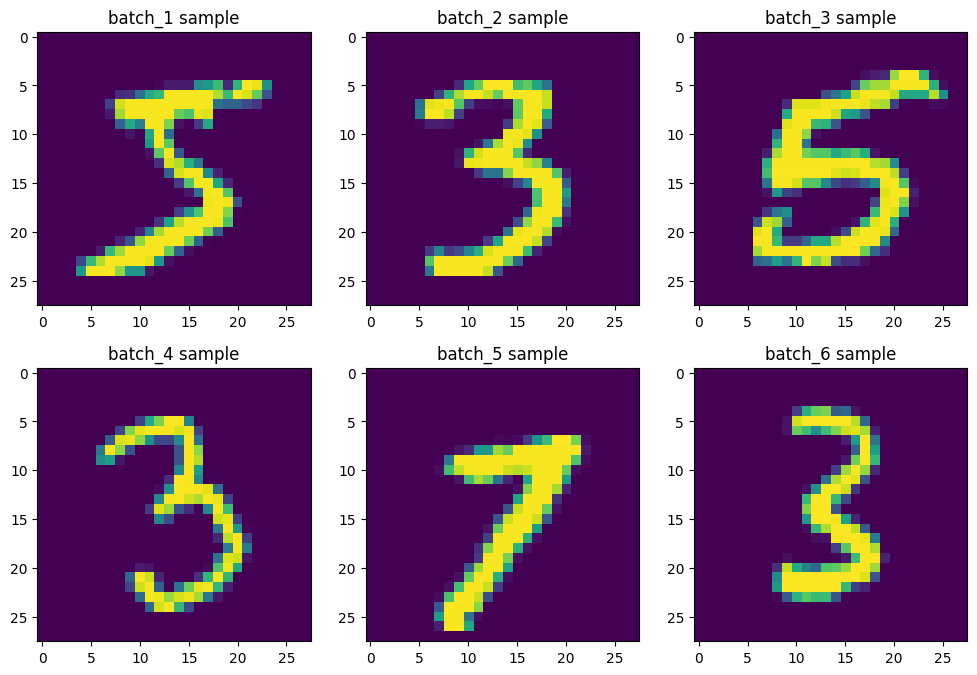

In [6]:
plt.figure(figsize=(12, 8))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(f'batch_{i+1} sample')
  plt.imshow(batch_list[i][0])

### 1.2. 텐서 연산

**Dense 층 직접 구현**

output = relu(dot(W, input) + b)

In [7]:
# relu 함수
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [8]:
# sum 함수
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

직접 구현한 Dense 층 연산

In [9]:
# 실험용 데이터 생성
x = np.random.random((20, 100))
y = np.random.random((20, 100))
print(len(x), x[0])

20 [0.73160338 0.08829926 0.22960123 0.65469621 0.53413175 0.12181249
 0.23352389 0.32023318 0.4593815  0.8661736  0.12892606 0.48600645
 0.32230541 0.15639612 0.31224314 0.83121978 0.80165868 0.04925126
 0.54974999 0.47710554 0.30693162 0.14431512 0.32972644 0.6451205
 0.20524695 0.90614488 0.794594   0.56140489 0.20133652 0.73639037
 0.29378244 0.80363514 0.06469733 0.76720844 0.64455584 0.34855655
 0.98593034 0.58224344 0.93669371 0.07078425 0.29571691 0.63024619
 0.08979458 0.08912209 0.27678707 0.77872331 0.47055555 0.6630345
 0.71071306 0.5675957  0.37980375 0.50574748 0.58309805 0.40776968
 0.65853284 0.89875991 0.90043768 0.54070678 0.91591804 0.45092056
 0.47411218 0.45233415 0.21431441 0.37600908 0.03540695 0.24089653
 0.28757349 0.37667025 0.6524487  0.61096416 0.85529256 0.733444
 0.10252827 0.19199216 0.0541462  0.23356457 0.44534957 0.23995475
 0.35951834 0.36196054 0.93686366 0.17697439 0.92309595 0.77277154
 0.05479455 0.74330676 0.38397469 0.30038016 0.5270978  0.73223

In [10]:
# Dense 정방향 계산
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.69 s


In [11]:
# numpy 이용 시
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


## 2. 선형 분류 (linear classification) 실습

### 2.1. 데이터 생성

2D 평면에 두 클래스의 랜덤한 포인트 생성하기

In [12]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], # 포인트 집단의 평균
    cov=[[1, 0.5],[0.5, 1]], # 포인트 집단의 공분산
    size=num_samples_per_class) # 첫번째 클래스의 포인트 생성
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class) # 다른 평균과 공분산을 가진 두번째 클래스

In [13]:
print(positive_samples.shape)
print(positive_samples[0])

(1000, 2)
[ 3.03763763 -0.15924351]


두 클래스를 (2000, 2) 크기의 하나의 배열로 쌓기

In [14]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

(2000, 2)


(0과 1로 구성된) 정답지 생성하기

In [15]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [16]:
print(targets.shape)
print(targets[0], targets[1000])

(2000, 1)
[0.] [1.]


두 클래스의 포인트를 그래프로 그리기

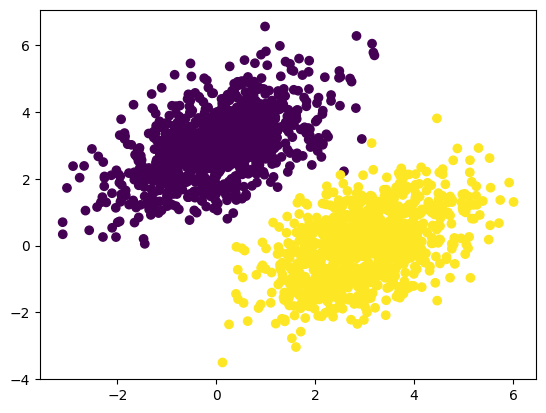

In [17]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

### 2.2. 모델 설계

선형 분류기의 가중치 변수 만들기 (W, b)

In [18]:
input_dim = 2 # 입력은 2D 포인트
output_dim = 1 # 출력 예측은 샘플당 하나의 점수 (0~1)
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # kernel parameter
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # bias parameter

정방향 패스 함수 (선형 분류이므로 연산은 단순한 선형 변환식이다)

y = W * x + b

In [19]:
def model(inputs):
  return tf.matmul(inputs, W) + b
# tf.matmul() 함수는 점곱을 수행하는 텐서플로 내장함수

손실함수 = 평균 제곱 오차 함수 (Mean Squared Error; MSE)

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) # 각 샘플별 제곱(tf.square()) 오차
    return tf.reduce_mean(per_sample_losses) # 전체 샘플별 제곱 오차의 평균(tr.reduce_mean()) = MSE

훈련 스텝 함수

In [21]:
learning_rate = 0.1 # 학습률

def training_step(inputs, targets):
    with tf.GradientTape() as tape: # 계산 그래프 생성
        predictions = model(inputs) # 계산 그래프 안에 모델의 정방향 패스 배치
        loss = square_loss(targets, predictions) # 손실 계산
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # 가중치에 대한 손실의 Gradient 계산
    W.assign_sub(grad_loss_wrt_W * learning_rate) # 가중치(W) 업데이트
    b.assign_sub(grad_loss_wrt_b * learning_rate) # 가중치(b) 업데이트
    return loss

### 2.3. 모델 훈련

In [22]:
for step in range(40): # 40번 학습
    loss = training_step(inputs, targets)
    print(f"{step+1}번째 스텝의 손실: {loss:.4f}") # 각 학습 epoch 별 손실 출력

1번째 스텝의 손실: 0.1197
2번째 스텝의 손실: 0.0890
3번째 스텝의 손실: 0.0810
4번째 스텝의 손실: 0.0758
5번째 스텝의 손실: 0.0714
6번째 스텝의 손실: 0.0674
7번째 스텝의 손실: 0.0638
8번째 스텝의 손실: 0.0604
9번째 스텝의 손실: 0.0574
10번째 스텝의 손실: 0.0546
11번째 스텝의 손실: 0.0521
12번째 스텝의 손실: 0.0498
13번째 스텝의 손실: 0.0476
14번째 스텝의 손실: 0.0457
15번째 스텝의 손실: 0.0439
16번째 스텝의 손실: 0.0423
17번째 스텝의 손실: 0.0408
18번째 스텝의 손실: 0.0395
19번째 스텝의 손실: 0.0383
20번째 스텝의 손실: 0.0371
21번째 스텝의 손실: 0.0361
22번째 스텝의 손실: 0.0352
23번째 스텝의 손실: 0.0343
24번째 스텝의 손실: 0.0335
25번째 스텝의 손실: 0.0328
26번째 스텝의 손실: 0.0322
27번째 스텝의 손실: 0.0316
28번째 스텝의 손실: 0.0310
29번째 스텝의 손실: 0.0305
30번째 스텝의 손실: 0.0301
31번째 스텝의 손실: 0.0296
32번째 스텝의 손실: 0.0293
33번째 스텝의 손실: 0.0289
34번째 스텝의 손실: 0.0286
35번째 스텝의 손실: 0.0283
36번째 스텝의 손실: 0.0280
37번째 스텝의 손실: 0.0278
38번째 스텝의 손실: 0.0276
39번째 스텝의 손실: 0.0274
40번째 스텝의 손실: 0.0272


### 2.4. 결과 분석

모델 예측

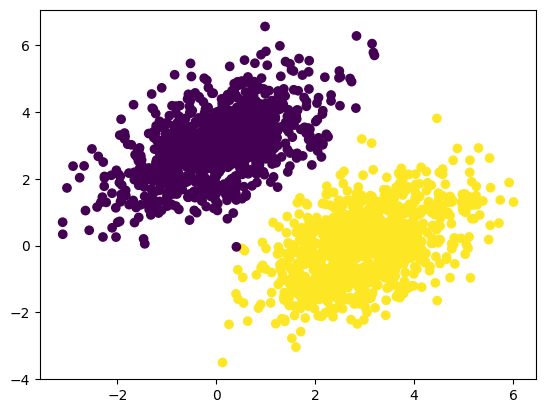

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5, cmap='viridis')
plt.show()

정답지와 비교

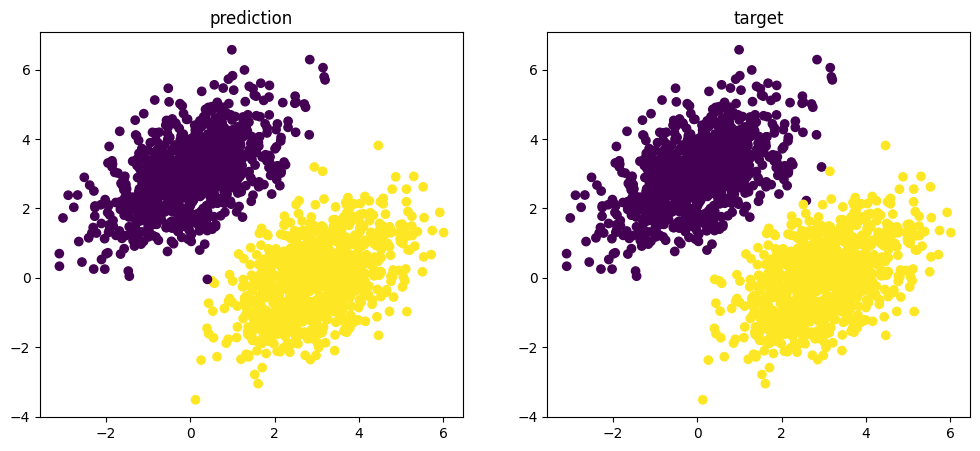

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('prediction')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5, cmap='viridis')
plt.subplot(1,2,2)
plt.title('target')
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

선형분류기의 경계면 그리기

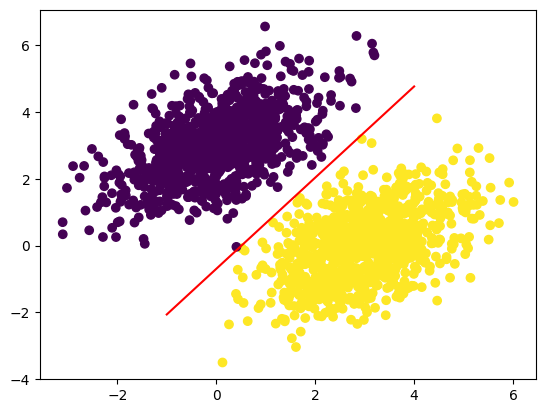

In [25]:
x = np.linspace(-1, 4, 100) # 경계선 x축 리스트
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # 경계선 함수
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 3. 밑바닥부터 딥러닝 구현하기 - Lecture 1 예제 재구현

### 3.1. 데이터 만들기 + 전처리: MNIST

In [26]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [27]:
# 텐서플로로 구현한 모델
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 3.2. 모델 설계

In [28]:
# Dense 층 구현
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value) # 무작위 초기화된 W 행렬

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value) # 무작위 초기화된 b 벡터

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b) # 정방향 패스 실행

    @property
    def weights(self):
        return [self.W, self.b] # 가중치 (W, b) 추출용 함수

In [29]:
# 단순한 직렬 신경망 구현 (Sequential 모델)
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x # 들어온 레이어들을 쌓아서 신경망 구성

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights # 신경망 전체의 가중치 추출

In [30]:
# 직접 신경망 구현하기
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [31]:
# 배치 제네레이터 (전체 MNIST 데이터셋에서 배치 추출)
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128): # 128 단위로 배치 추출
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 3.3. 훈련 시작

In [32]:
learning_rate = 1e-3 # 학습률

def update_weights(gradients, weights): # 가중치 업데이트
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate) # 현 가중치에 - gradient * learning_rate

In [33]:
# 하나의 훈련 스텝 정의
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape: # 계산 그래프 선언
        predictions = model(images_batch) # 정방향 패스 실행
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions) # 손실 함수 = categorical crossentropy
        average_loss = tf.reduce_mean(per_sample_losses) # 전체 모델의 손실
    gradients = tape.gradient(average_loss, model.weights) # 가중치에 대한 손실의 gradient 계산
    update_weights(gradients, model.weights) # gradient를 사용하여 가중치 업데이트
    return average_loss

In [34]:
# 전체 훈련 루프 선언
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs): # 총 epoch에 따라 위에서 정의한 훈련 스텝 반복
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels) # 앞서 정의 배치 제네레이터에서 배치 추출
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch) # 훈련 스텝을 통해 손실 계산 및 가중치 업데이트
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [35]:
# 훈련 시작!
fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 4.43
100번째 배치 손실: 2.26
200번째 배치 손실: 2.20
300번째 배치 손실: 2.09
400번째 배치 손실: 2.25
에포크 1
0번째 배치 손실: 1.88
100번째 배치 손실: 1.90
200번째 배치 손실: 1.82
300번째 배치 손실: 1.71
400번째 배치 손실: 1.85
에포크 2
0번째 배치 손실: 1.55
100번째 배치 손실: 1.60
200번째 배치 손실: 1.50
300번째 배치 손실: 1.42
400번째 배치 손실: 1.53
에포크 3
0번째 배치 손실: 1.29
100번째 배치 손실: 1.35
200번째 배치 손실: 1.23
300번째 배치 손실: 1.21
400번째 배치 손실: 1.29
에포크 4
0번째 배치 손실: 1.09
100번째 배치 손실: 1.17
200번째 배치 손실: 1.03
300번째 배치 손실: 1.05
400번째 배치 손실: 1.12
에포크 5
0번째 배치 손실: 0.95
100번째 배치 손실: 1.03
200번째 배치 손실: 0.89
300번째 배치 손실: 0.93
400번째 배치 손실: 1.00
에포크 6
0번째 배치 손실: 0.84
100번째 배치 손실: 0.92
200번째 배치 손실: 0.79
300번째 배치 손실: 0.84
400번째 배치 손실: 0.91
에포크 7
0번째 배치 손실: 0.76
100번째 배치 손실: 0.84
200번째 배치 손실: 0.71
300번째 배치 손실: 0.77
400번째 배치 손실: 0.84
에포크 8
0번째 배치 손실: 0.70
100번째 배치 손실: 0.77
200번째 배치 손실: 0.65
300번째 배치 손실: 0.71
400번째 배치 손실: 0.79
에포크 9
0번째 배치 손실: 0.65
100번째 배치 손실: 0.72
200번째 배치 손실: 0.60
300번째 배치 손실: 0.67
400번째 배치 손실: 0.75


### 3.4. 모델 평가하기

In [36]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1) # 최대값을 가진 index 추출 = 예측한 레이블
matches = predicted_labels == test_labels # 예측값 = 정답일 경우 1로 저장, 불칠치할 경우 0으로 저장
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81


In [37]:
# 샘플 하나에 대한 예측 (0번)
print(predictions[0])
print(predicted_labels[0])
print(test_labels[0])
print(matches[0])

[0.00681251 0.00100351 0.00270201 0.01254295 0.01474812 0.00498365
 0.00130015 0.8733181  0.00742459 0.07516444]
7
7
True


수고하셨습니다!